In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
url="https://drive.google.com/u/0/uc?id=1Gfj3tj9zPhyC19JyPHHUGaKbcn2_lDAY&export=download&confirm=t&uuid=2950f825-8464-4897-a435-31ed5ef63242&at=AB6BwCAI5Oe5dOhda1jSxQvyvlwO:1702113962739"
#url='Andmed.csv'
df = pd.read_csv(url)


In [2]:

df.proovivotu_aeg = pd.DatetimeIndex(df['proovivotu_aeg'], dayfirst=True)
df.sort_values(by="proovivotu_aeg")
df["month"] = pd.DatetimeIndex(df['proovivotu_aeg']).month



In [3]:

#df['naitaja.nimetus'] = df['naitaja.nimetus'].map(lambda x: x.lstrip('\(.*\)'))
df["naitaja.nimetus"] = df["naitaja.nimetus"].str.replace(r"\s*\(\s*.*\s*\)\s*","", regex=True)
df["naitaja.nimetus"] = df["naitaja.nimetus"].str.replace("oC", "°C", regex=False)
df["naitaja.nimetus"] = df["naitaja.nimetus"].str.replace("juures", "", regex=False)
df["naitaja.nimetus"] = df["naitaja.nimetus"].str.replace(" ", "", regex=False)
df["naitaja.nimetus"] = df["naitaja.nimetus"].str.replace("fluorene", "floreen", regex=False)

print(df["naitaja.nimetus"].unique())
mapping = {
    'vastab nõuetele': 1,
    'I kvaliteediklass': 1,
    'II kvaliteediklass': 1,
    'III kvaliteediklass': 1,
    'halvem kui III kvaliteediklass': 0,
    'ei vasta nõuetele': 0
}

df['joogiveeks_sobivus'] = df['naitaja.hinnang'].map(mapping)
print(len(df[df['joogiveeks_sobivus'] == 0]))
df.dropna(inplace=True)

['Escherichiacoli' 'Coli-laadsedbakterid' 'Enterokokid'
 'Clostridiumperfringens' 'Termotolerantsedcoli-laadsedbakterid'
 'Sooleenterokokid' 'Kolooniatearv22°C' 'Pestitsiidid'
 'Pestitsiididesumma' 'Tetrakloroeteenjatrikloroeteen' 'PAH-dsumma' 'Lõhn'
 'Hägusus' 'Maitse' 'Legionellad' 'Legionellaspp.' 'Värvus' 'Jääkkloor'
 'Salmonella' 'Lõhnaläveindeks' 'maitseläveindeks' 'Metüül-kloorpürifoss'
 'beeta-Endosulfaan' 'alfa-Endosulfaan' 'Endosulfaansulfaat' 'p,p-DDE'
 'Malatioon' 'Vinklosoliin' 'Trifluraliin' 'Etüül-paratioon' 'Triallaat'
 'o,p-DDD' 'o,p-DDT' 'o,p-DDE' 'p,p-DDD' 'Bromopropülaat'
 'Dikloorfluaniid' 'Aldriin' 'Dieldriin' 'Heptakloor' 'p,p-DDT'
 'Diazinoon' 'HCH,beeta' 'HCH,alfa' 'Protsümidoon' 'Tolüülfluaniid'
 'alfa-Tsüpermetriin' 'lambda-Tsühalotriin' 'Teknaseen' 'HCH,gamma'
 'Propikonasool' 'Heksakloorbenseen' 'Klorotaloniil'
 'Heptakloorepoksiid-?-isomeer' 'trans-Heptakloorepoksiid' 'Endriin'
 'cis-Heptakloorepoksiid' 'Kloorpürifoss' 'Kloorfenvinfoss'
 'Pseudomonasaerugi

In [4]:

#filteredData = {}
#for feature in df["naitaja.nimetus"].unique():
#    subdata = df[df["naitaja.nimetus"].isin([feature])]
#    if(len(subdata) >= 200):
#        filteredData[feature] = subdata
    

In [5]:

#for label, feature in filteredData.items():

#    fig, axs = plt.subplots(figsize=(12, 4))
#    avg_values = subdata.groupby([(subdata.year)])["näitaja_sisaldus"].mean();
    
#    avg_values.plot(
#        kind='bar', rot=0, ax=axs)
#    plt.xlabel(label);
#    plt.show()

In [6]:

grouped = df.groupby(['naitaja.nimetus', 'year','maakond']) 
total_tests = grouped['joogiveeks_sobivus'].count()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#print(df.groupby(['naitaja.nimetus', 'year', 'joogiveeks_sobivus']).size())

failed_tests = grouped['joogiveeks_sobivus'].apply(lambda x: (x==0).sum())

# Calculate the percentage of failed tests
percentage_failed = (failed_tests / total_tests) * 100

# Create a new DataFrame
new_df = pd.DataFrame({
    'naitaja.nimetus': failed_tests.index.get_level_values('naitaja.nimetus'),
    'Year': failed_tests.index.get_level_values('year'),
    'Maakond': failed_tests.index.get_level_values('maakond'),
    'Percentage Failed': percentage_failed.values,
    'Total tests' : total_tests.values
})

# Reset the index
new_df.reset_index(drop=True, inplace=True)

print(new_df)

                            naitaja.nimetus  Year             Maakond  \
0                       1,1,1-trikloroetaan  2012    Ida-Viru maakond   
1                       1,1,1-trikloroetaan  2016       Pärnu maakond   
2                       1,1,1-trikloroetaan  2019       Tartu maakond   
3                       1,1,1-trikloroetaan  2022        Hiiu maakond   
4                          1,2-dikloroetaan  2012       Harju maakond   
5                          1,2-dikloroetaan  2012    Ida-Viru maakond   
6                          1,2-dikloroetaan  2012       Järva maakond   
7                          1,2-dikloroetaan  2012      Jõgeva maakond   
8                          1,2-dikloroetaan  2012       Lääne maakond   
9                          1,2-dikloroetaan  2012  Lääne-Viru maakond   
10                         1,2-dikloroetaan  2012       Pärnu maakond   
11                         1,2-dikloroetaan  2012       Põlva maakond   
12                         1,2-dikloroetaan  2012  

In [7]:
feature_to_remove = new_df.groupby('naitaja.nimetus').filter(lambda x: all(x['Percentage Failed'] == 0))
feature_names = feature_to_remove['naitaja.nimetus'].unique()
final_df = new_df[~new_df['naitaja.nimetus'].isin(feature_names)]

feature_to_remove2 = new_df.groupby('naitaja.nimetus').filter(lambda x: any(x['Total tests'] == 0))
feature_names2 = feature_to_remove2['naitaja.nimetus'].unique()
final_df = final_df[~final_df['naitaja.nimetus'].isin(feature_names2)]

grouped_df = final_df.groupby('naitaja.nimetus')['Total tests'].sum().reset_index()


top_20 = grouped_df.sort_values('Total tests', ascending=False)

final_df = final_df[final_df['naitaja.nimetus'].isin(top_20['naitaja.nimetus'])]
final_df.reset_index(drop=True, inplace=True)
print(final_df)

             naitaja.nimetus  Year             Maakond  Percentage Failed  \
0                 Alumiinium  2012       Harju maakond           1.932367   
1                 Alumiinium  2012    Ida-Viru maakond           0.000000   
2                 Alumiinium  2012       Järva maakond           0.000000   
3                 Alumiinium  2012      Jõgeva maakond           0.000000   
4                 Alumiinium  2012       Lääne maakond           0.000000   
5                 Alumiinium  2012  Lääne-Viru maakond           0.000000   
6                 Alumiinium  2012       Pärnu maakond           0.000000   
7                 Alumiinium  2012       Põlva maakond           0.000000   
8                 Alumiinium  2012       Rapla maakond           0.000000   
9                 Alumiinium  2012       Saare maakond           0.000000   
10                Alumiinium  2012       Tartu maakond           0.000000   
11                Alumiinium  2012       Valga maakond           0.000000   

In [8]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#final_df = new_df
#plt.figure(figsize=(15, 12))
#sns.lineplot(data=final_df, x='Year', y='Percentage Failed', hue='naitaja.nimetus', style='naitaja.nimetus')

#plt.title('Failed Rate of Tests Over the Years')
#plt.xlabel('Year')
#plt.ylabel('Success Rate (%)')
#plt.legend(loc='lower right')

#plt.show()

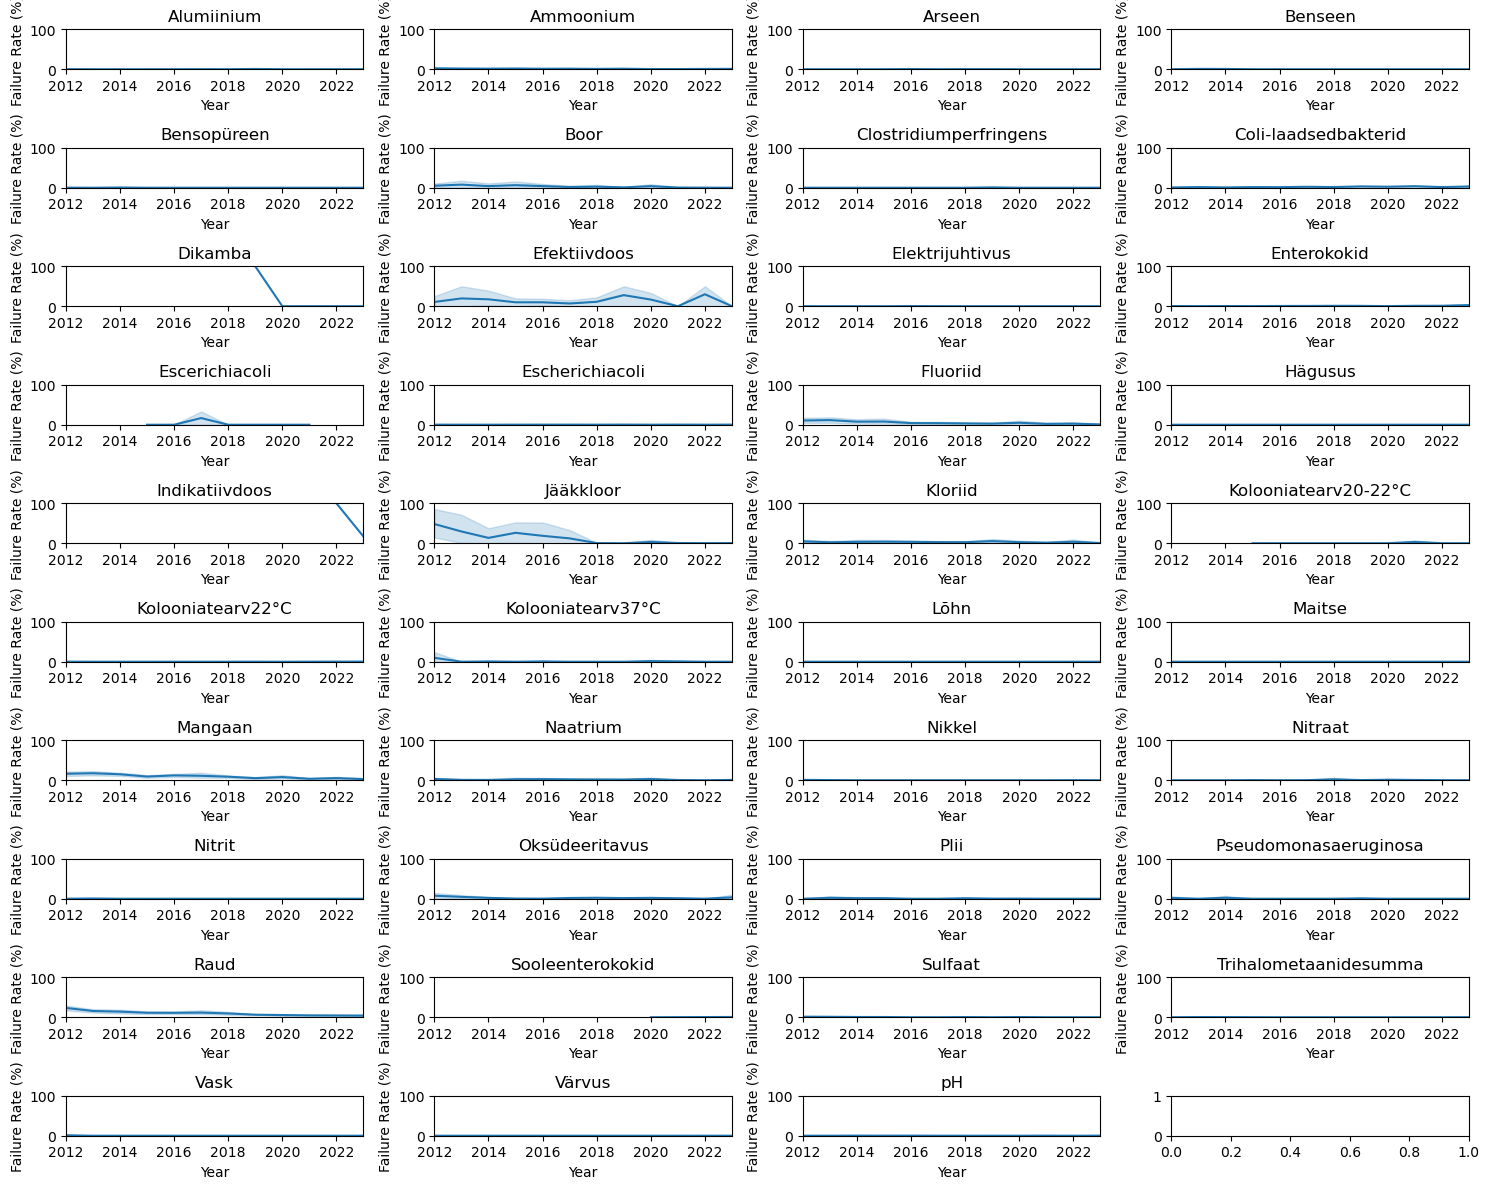

In [9]:

if(len(final_df.groupby(by="naitaja.nimetus")) % 4 == 0):
    rows = len(final_df.groupby(by="naitaja.nimetus"))//4
else: 
    rows = len(final_df.groupby(by="naitaja.nimetus"))//4 + 1
fig, axs = plt.subplots(rows, 4, figsize=(15, 12))

# Get unique categories
categories = final_df['naitaja.nimetus'].unique()

# Determine the global y-axis limits
global_min = final_df['Percentage Failed'].min()
global_max = final_df['Percentage Failed'].max()

for ax, category in zip(axs.flatten(), categories):
    data = final_df[final_df['naitaja.nimetus'] == category]

    #shows per county
    #line_plot = sns.lineplot(data=data, x='Year', y='Percentage Failed', hue='Maakond', ax=ax)
    #line_plot.legend_.remove()
    sns.lineplot(data=data, x='Year', y='Percentage Failed', ax=ax)
    ax.set_title(category)
    ax.set_xlabel('Year')
    ax.set_ylabel('Failure Rate (%)')
    
    # Set the same y-axis limits for all subplots
    ax.set_ylim(global_min, global_max)
    ax.set_xlim(2012, 2023)
    
#plt.legend(title='Maakond', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [12]:
url='data/KK25 PINNAVEEKOGUDESSE JUHITUD HEITVEE REOSTUSKOORMUS  Maakond, Aasta ning Reostuskoormuse näitaja.csv'
df2 = pd.read_csv(url, skiprows=2)
df2 = df2[["Maakond", "Aasta", "Bioloogiline hapnikutarve (BHT7)","Keemiline hapnikutarve (KHT-Cr)","Heljum","Üldlämmastik","Üldfosfor"]]
df2 = df2.rename(columns={'Aasta':'Year'})

In [45]:


# Merge the two dataframes on 'year' and 'maakond'
merged_df = pd.merge(final_df, df2, on=['Year', 'Maakond'])
print(merged_df)


             naitaja.nimetus  Year             Maakond  Percentage Failed  \
0                 Alumiinium  2012       Harju maakond           1.932367   
1                  Ammoonium  2012       Harju maakond           3.906250   
2                     Arseen  2012       Harju maakond           0.000000   
3                    Benseen  2012       Harju maakond           0.000000   
4                Bensopüreen  2012       Harju maakond           0.000000   
5                       Boor  2012       Harju maakond           1.149425   
6     Clostridiumperfringens  2012       Harju maakond           0.000000   
7       Coli-laadsedbakterid  2012       Harju maakond           0.072133   
8               Efektiivdoos  2012       Harju maakond          25.000000   
9            Elektrijuhtivus  2012       Harju maakond           0.000000   
10               Enterokokid  2012       Harju maakond           0.000000   
11           Escherichiacoli  2012       Harju maakond           0.000000   

In [42]:
result_corr = merged_df[["Year","Maakond","Percentage Failed","Bioloogiline hapnikutarve (BHT7)", 'naitaja.nimetus']]

In [53]:
from scipy import stats

# Define the significance level
alpha = 0.05

# Group the data by 'maakond' and 'naitaja.nimetus' and perform the calculations for each group
results = {}
for (maakond, naitaja_nimetus), group in result_corr.groupby(['Maakond', 'naitaja.nimetus']):
    if len(group) >= 2:
        # Calculate Pearson correlation coefficient
        correlation, _ = stats.pearsonr(group['Percentage Failed'], group['Bioloogiline hapnikutarve (BHT7)'])

        # Perform t-test for correlation
        t_score = correlation * (len(group) - 2)**0.5 / (1 - correlation**2)**0.5
        p_value = stats.t.sf(abs(t_score), df=len(group)-2)*2  # two-sided p-value

        # Decision to reject the null hypothesis
        reject_null = p_value < alpha

        # Store the results
        results[(maakond, naitaja_nimetus)] = {
            'Pearson correlation coefficient': correlation,
            't-score': t_score,
            'p-value': p_value,
            'Reject Null Hypothesis': reject_null
        }

import math
from collections import defaultdict

# Filter out NaN values and sort the results by Pearson correlation coefficient
filtered_sorted_results = sorted(
    ((k, v) for k, v in results.items() if not math.isnan(v['Pearson correlation coefficient'])),
    key=lambda x: x[1]['Pearson correlation coefficient']
)

# Group the sorted and filtered results by 'naitaja.nimetus'
grouped_results = defaultdict(list)
for (maakond, naitaja_nimetus), res in filtered_sorted_results:
    grouped_results[naitaja_nimetus].append((maakond, res))

# Output the grouped results
for naitaja_nimetus, group in grouped_results.items():
    print(f'Naitaja Nimetus: {naitaja_nimetus}')
    for maakond, res in group:
        print(f'\tMaakond: {maakond}')
        print(f'\tPearson correlation coefficient: {res["Pearson correlation coefficient"]}')
        print(f'\tt-score: {res["t-score"]}, p-value: {res["p-value"]}')
        print(f'\tReject Null Hypothesis: {"Yes" if res["Reject Null Hypothesis"] else "No"}')
    print('---')

Naitaja Nimetus: Ammoonium
	Maakond: Lääne-Viru maakond
	Pearson correlation coefficient: -0.764293543102927
	t-score: -3.555578595802988, p-value: 0.006161800804498918
	Reject Null Hypothesis: Yes
	Maakond: Hiiu maakond
	Pearson correlation coefficient: -0.435285750066007
	t-score: -1.4504813352456847, p-value: 0.18086547910352632
	Reject Null Hypothesis: No
	Maakond: Võru maakond
	Pearson correlation coefficient: -0.34448476534987227
	t-score: -1.1008342608116328, p-value: 0.29953833954583226
	Reject Null Hypothesis: No
	Maakond: Viljandi maakond
	Pearson correlation coefficient: -0.28024166869771483
	t-score: -0.8758195506623284, p-value: 0.4038970014167893
	Reject Null Hypothesis: No
	Maakond: Ida-Viru maakond
	Pearson correlation coefficient: -0.23317598675587314
	t-score: -0.7193573679139443, p-value: 0.49017692475995456
	Reject Null Hypothesis: No
	Maakond: Valga maakond
	Pearson correlation coefficient: -0.09599892384710906
	t-score: -0.2893330743557961, p-value: 0.778880921268

C:\Users\Mihkel\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
